# TP1: Canny Edges

Read, understand, and complete the following notebook. You must return the completed notebook, including your answers and illustrations (you may need to add cells to write your code or comments). 

To execute a notebook, you will need to [install jupyter](http://jupyter.org/install.html). If you are using anaconda (strongly advised) you will have necessary libraries, if not, you may need to install them. If you cannot/don't want to use notebooks, you can return both your python code and a report in pdf. 

Return your work by e-mail using a single file (ipynb or zip) with the format 'introvis17_tp1_yourname.ipynb'

The first part is about basic image processing in Python, the second guides you in the implementation of the Canny edge detector.

## 1. Basic image processing in Python

Here are a set of useful libraries for image processing. You will need to refer to the online documentation of the different libraries to complete the TP.

In [1]:
import numpy as np 
# this is the key library for manipulating arrays. Use the online ressources! http://www.numpy.org/

import matplotlib.pyplot as plt 
# used to read images, display and plot http://matplotlib.org/api/pyplot_api.html . 
#You can also check this simple intro to using ipython notebook with images https://matplotlib.org/users/image_tutorial.html

%matplotlib inline 
# to display directly in the notebook

import scipy.ndimage as ndimage
# one of several python libraries for image procession

plt.rcParams['image.cmap'] = 'gray' 
# by default, the grayscale images are displayed with the jet colormap: use grayscale instead

Here is a simple example how to read and display an image.

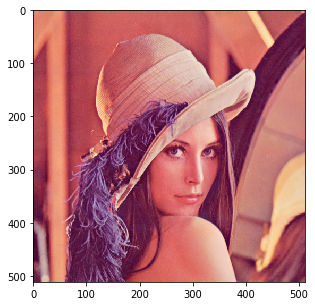

In [2]:
name='lena.jpg'
I=plt.imread(name)
plt.figure(figsize=(5,5)) # this line is not necessary, but allows you to control the size of the displayed image
plt.imshow(I)
plt.show() # this is necessary only if you want to display several images

a- What's the size of the image I? Its type? The type of the values it contains? What's its range? 

In [3]:
print("The type of the image is ",type(I),"i.e a numpy array")
#I is a numpy array
print("The shape of the image is ",I.shape)
#I is a 512*512*3 image
W=I.shape[0]
H=I.shape[1]
print("The elements of the image are ",I.dtype,"i.e. they are bytes")
#Its elements are bytes (uint8 in Python)

print("The values range from ",np.amin(I), " to ",np.amax(I))
#max value : 255
#min value: 0

The type of the image is  <class 'numpy.ndarray'> i.e a numpy array
The shape of the image is  (512, 512, 3)
The elements of the image are  uint8 i.e. they are bytes
The values range from  0  to  255


b- Here is a simple function to load an image and crop it according to a bounding box. Make sure you understand every line

In [4]:
def load_image_v0(name,crop_window=-1): 
    I=plt.imread(name)
    if crop_window!=-1:
        I=I[crop_window[0]:crop_window[1],crop_window[2]:crop_window[3]]
    I=I.astype('float')/255 # just to scale the values of the image between 0 and 1 (instead of 0 255)
    return I

Use the function to display and save the 100x50 pixels of the bottom left corner of 'lena'. 

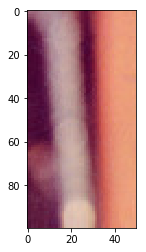

In [5]:
crop_window=[H-100,H,0,50]
Lena=load_image_v0('lena.jpg',crop_window)
plt.imshow(Lena)
plt.show()


c- Modify the following function so that it can load an RGB image and convert it to a grayscale image (i.e. converting it from a WxHx3 array to a WxH array) using the formula L=0.2989 * R + 0.5870 * G + 0.1140 * B, where R, G and B are the three color channels of the color image and L is the luminance (i.e. the grayscale image). Include a test so that your function also works if the input image is grayscale.

In [25]:
# Your answers

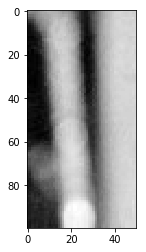

In [6]:
def load_image(name,crop_window=-1): 
    # Complete
    I=plt.imread(name)
    if crop_window!=-1:
        I=I[crop_window[0]:crop_window[1],crop_window[2]:crop_window[3]]
    I=I.astype('float')/255 #scale values between 0 an 1
    h=I.shape[0]
    w=I.shape[1]
    #If the image has colors
    if (I.shape[2]==3):
        Grey_Image=0.2989*I[...,0] + 0.5870*I[...,1] +0.1140*I[...,2]
        return Grey_Image
    else:#if the image is already greyscale
        return I

crop_window=[W-100,W,0,50]

I=load_image('lena.jpg',crop_window)
plt.imshow(I)
plt.show()

Use your function to load a grayscale version of lena and save it as a png image.

In [7]:
I=load_image('lena.jpg')
plt.imsave('grey_lena.png', I)

For the rest of the TP, *use only grayscale images*

d- Here is an example of how to convolve an image with a Gaussian. What is the size of the output? What are the border conditions? Replace the border conditions with zero padding and comment on the result

shape of Output: (512, 512)


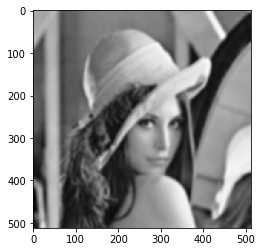

In [8]:
Ib=ndimage.gaussian_filter(I, sigma=3)
print("shape of Output:",Ib.shape)
plt.imshow(Ib)


ANSWER : The output is an array of size 512*512. <br>
According to scipy documentation, ndimage.gaussian_filter applies by default the "reflect mode": the image is extended with pixels obtained by reflecting the pixels  on the edge of the image. 
Instead of this, we can extend the image with zero-padding, which consists in extending the image with black pixels.

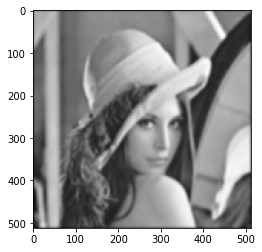

In [9]:
zero_padding_Ib=ndimage.gaussian_filter(I, sigma=3,mode="constant",cval=0.0)
plt.imshow(zero_padding_Ib)



ANSWER <br>
The output image is supposed to have darker borders than the original. However, the modification is hard to visualize.  


e- What does the following code do? What's its visual effect on the image?


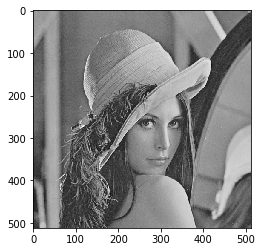

In [10]:
k = np.array([[-1./9, -1./9, -1./9],
               [-1./9, 17./9, -1./9],
               [-1./9, -1./9, -1./9]])
O=ndimage.convolve(I, k)
plt.imshow(O)


ANSWER : The above code convolves the image with a kernel k. We can see that the details in the image are enhanced. This is a sharpening filter, accentuating the outline of the shapes in the image.

f- Write a function "compute_gradient" that returns three images containing the input image derivative along the horizontal direction, the vertical direction, and the gradient norm. It should use forward differences, and take an optional argument "sigma" that gives the scale of the derivative (i.e. the standard deviation of the Gaussian kernel used to blur the image before taking the finite derivative). What is the size of the output compared to the size of the input?

In [11]:
def compute_gradient(I, sigma=0):
    
    #apply gaussian filter
    Ib=ndimage.gaussian_filter(I, sigma)
    
    #kernels for convolution
    k_x=np.array([[-1,1]]) #horizontal direction
    k_y=np.array([[1],[-1]])#vertical direction
    
    #Computation of derivatives and gradient norm
    I_xderivative=ndimage.convolve(Ib,k_x)
    I_yderivative=ndimage.convolve(Ib,k_y)
    I_gradientnorm=np.sqrt(np.square(I_xderivative)+np.square(I_yderivative))
    return(I_xderivative, I_yderivative,I_gradientnorm)
    

ANSWER : The shape of the input image is of (512,512). The shape of the ouptut images remains the same, since they are still gray-scale images. 

g- Visualize the three images returned by your function for different values of sigma. Comment.


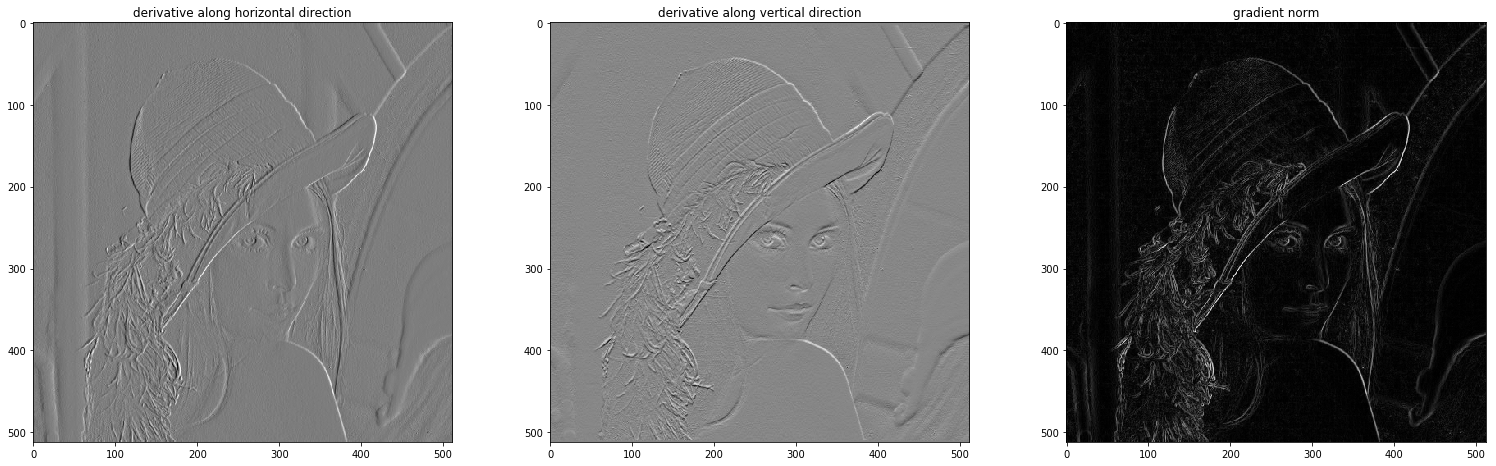

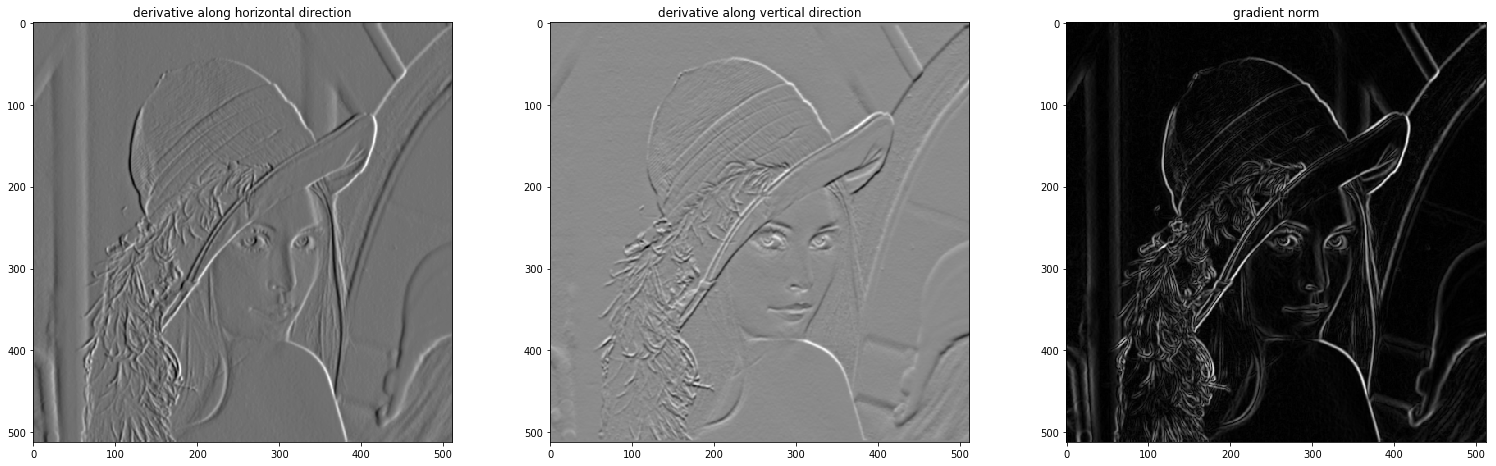

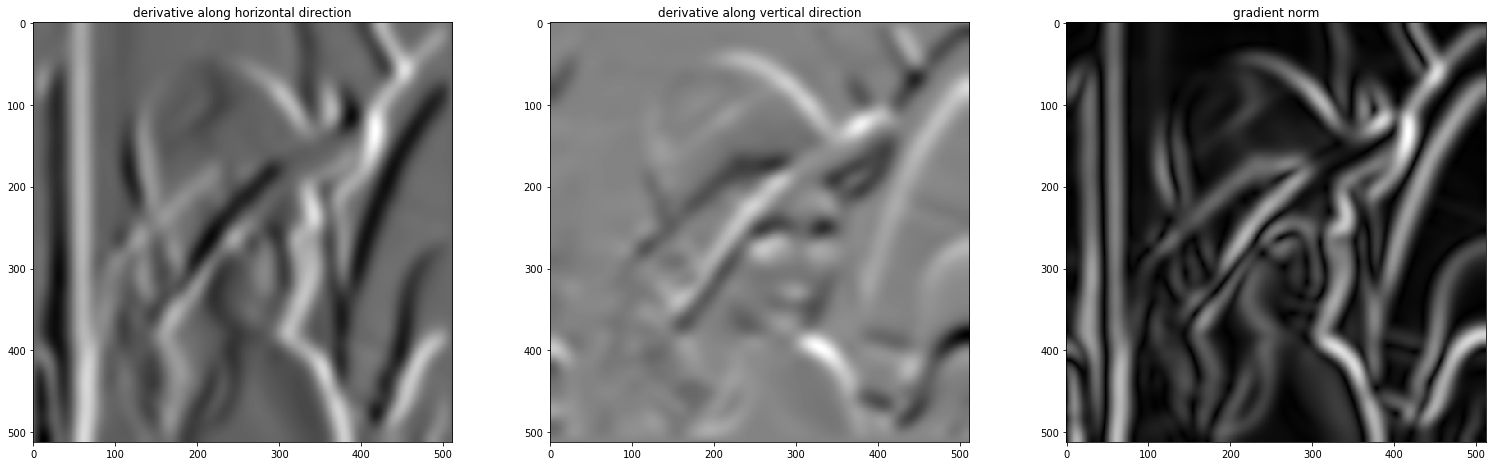

In [12]:
def display_images(I,sigma=0):
    #display images
    titles=["derivative along horizontal direction", "derivative along vertical direction", "gradient norm"]
    images=compute_gradient(I,sigma)
    fig = plt.figure(figsize=(18,18))
    for n, (image, title) in enumerate(zip(images, titles)):
        a=fig.add_subplot(6, 6, n + 1)
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * 3)
    plt.show()

sigmas=[0,1,10]
for i in range(len(sigmas)):
    display_images(I,sigmas[i])

As we can see, the higher the value of sigma, the greater the blur effect on the image. When sigma increases, "more average" is performed when using the gaussian filter, which causes this effect. For great values of sigma (sigma=10 and above), the shapes of the image become hard to make out. 

If you had difficulties to do this first part, it might be good to look at a few more examples before writting your own code. You can find many python tutorial for image processing online, for example http://www.scipy-lectures.org/advanced/image_processing/

## 2. Canny edges

a- Compute a binary image corresponding to thresholding the norm of the gradient. Discuss the parameters (there are two) and their influence of the results

Text(0.5, 1.0, 'sigma=0.5, threshold=0.03')

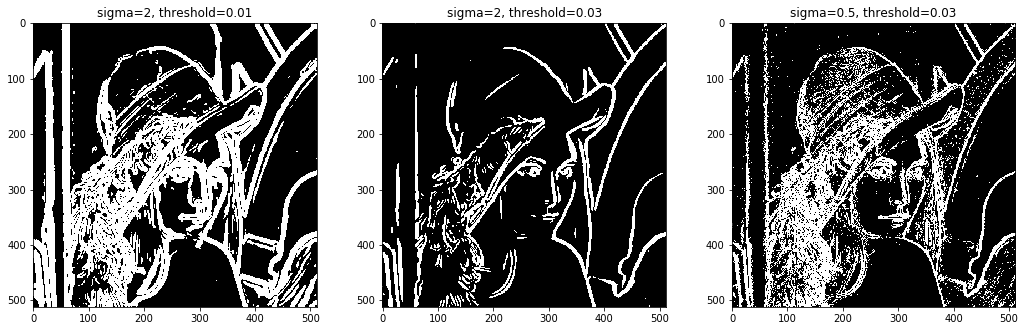

In [13]:
def gradient_threshold(I,sigma,threshold):
    G_norm=compute_gradient(I,sigma)[2]#Get gradient norm of image
    G_norm=G_norm>threshold
    return(G_norm)

images=[gradient_threshold(I,2,0.01),gradient_threshold(I,2,0.03),gradient_threshold(I,0.5,0.03)]

fig = plt.figure(figsize=(24,24))
a=fig.add_subplot(4, 4, 1)
plt.imshow(images[0])
a.set_title("sigma=2, threshold=0.01")

a=fig.add_subplot(4, 4, 2)
plt.imshow(images[1])
a.set_title("sigma=2, threshold=0.03")

a=fig.add_subplot(4, 4, 3)
plt.imshow(images[2])
a.set_title("sigma=0.5, threshold=0.03")  

ANSWER<br>
With the above function, taking the gradient norm of the image, we only keep the pixels whose value is higher than a given threshold. The higher the value of the threshold, the darker the image, as more pixels will have a value under that threshold, and will therefore be set to zero. However we don't want to choose a bound which is too low, otherwise noise will be kept on the picture. <br>
What's more, if the value of the threshold is too high, it will be hard to extract any strong edges at all.<br>
The value of sigma determines how blurry the image is. If the value of sigma is high, the edges are thicker and details are lost. <br>
A compromise has to be found between the values of sigma and the threshold, in order to suppress residual noise without getting rid of the details. <br>


b- Write a function "nms(gradient)" which takes as input the gradient and outputs a binary images with value 1 only for pixels that correspond to a maximum in the direction of the gradient.

ANSWER <br>
Here we want to thin out the edges of the image which have been blurred by the Gaussian Filter. <br>
In the code below, for any given pixel (i,j), we look at the angle of the gradient to the horizontal axis, and round it to one of the four following angles: 0, pi/4, pi/2, 3*pi/4 (corresponding to the 4 directions North-South, East-West, Northeast-Southwest, and Northwest-Southeast). <br> Then we look at the two neighbors of pixel (i,j) in the gradient direction: if the value of pixel (i,j) is greater than both the values of its neighbors, than we keep it, otherwise we set it to 0. 

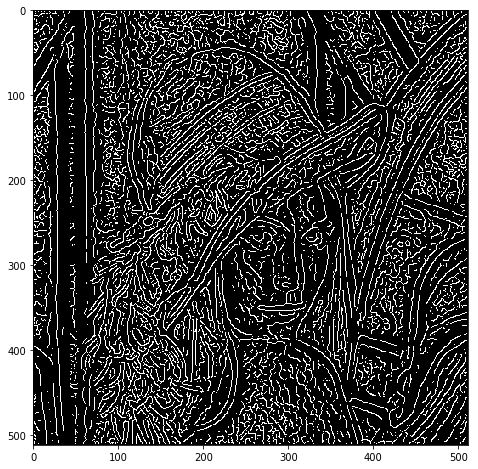

In [14]:
def nms(G_x,G_y,G_norm):
    angles=[0,np.pi/4,np.pi/2,3*np.pi/4]
    H=G_norm.shape[0]
    W=G_norm.shape[1]
    nms_gradient=np.zeros((H,W))
    
    
    #Compute gradient direction: the real angle will be rounded up to one of the 4 angles:
    # 0, pi/4, pi/2, 3*pi/4 (noted as direction 0, 1, 2 and 3)
    theta=np.arctan2(G_y,G_x)
    direction=np.around(theta/(np.pi/4))%4
    
    
    #Looking at the pixels in the direction of the gradient
    #pixel value is set to 0 if it is lower than the value of 2 pixels in gradient direction
    for i in range(H):
        for j in range(W):
            
            #border pixels are set to zero
            if (i==0 or i==H-1 or j==0 or j==W-1):
                nms_gradient[i,j]=0
            
            else:
                theta=direction[i,j]
                if (theta==0):# 0 angle i.e. N-S direction
                    if ((G_norm[i,j]<=G_norm[i,j-1]) or (G_norm[i,j]<=G_norm[i,j+1])):
                        nms_gradient[i,j]=0
                    else:
                        nms_gradient[i,j]=1
            
                if (theta==1):# pi/4 angle i.e. NE-SW direction
                    if ((G_norm[i,j]<=G_norm[i-1,j+1]) or (G_norm[i,j]<=G_norm[i+1,j-1])):
                            nms_gradient[i,j]=0
                    else:
                        nms_gradient[i,j]=1
                
                if (theta==2):# pi/2 angle i.e. N-S direction
                    if ((G_norm[i,j]<=G_norm[i-1,j]) or (G_norm[i,j]<=G_norm[i+1,j])):
                        nms_gradient[i,j]=0
                    else:
                        nms_gradient[i,j]=1
            
                if (theta==3):# -pi/4 i.e. NW-SE direction
                    if ((G_norm[i,j]<=G_norm[i-1,j-1]) or (G_norm[i,j]<=G_norm[i+1,j+1])):
                        nms_gradient[i,j]=0
                    else:
                        nms_gradient[i,j]=1
    return(nms_gradient)


#Compute and display image with Non-max suppression gradient
G_x,G_y,G_norm=compute_gradient(I,2)
NMS=nms(G_x,G_y,G_norm)
plt.figure(figsize=(8, 8))
plt.imshow(NMS)

c- Combine 'a' and 'b' to extract edges with a gradient norm larger than a given threshold.

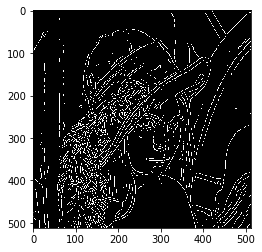

In [15]:
sigma=2
threshold=0.01
#compute gradient of image
G_x,G_y,G_norm=compute_gradient(I,sigma)
#perform Non-Max Suppression
NMS=nms(G_x,G_y,G_norm)
#Gradient threshold
I_threshold=(G_norm*NMS)>threshold
plt.imshow(I_threshold)
    

d- Add the hysteresis thresholding to 'c' to implement a function computing the Canny edges.

Here is one way to do the hysteresis thresholding. Keep a list of the edges for which you have to visit neighboors. Initialize the list with the edges corresponding to the most discriminative threshold. For each edge you are sure of (i.e. in the list), you have to check if its neighboors are considered edges using the less discriminative threshold. If they are, add them to the output edges and in the list of edges to visit.

In [17]:
def canny(I,sigma,lower,upper):
    
    #compute gradient of image
    G_x,G_y,G_norm=compute_gradient(I,sigma)
    #perform Non-Max Suppression
    NMS=nms(G_x,G_y,G_norm)
    
    #strong and weak edges
    canny_edges=(G_norm*NMS)>upper
    weak_edges=(G_norm*NMS)>lower
    
    #list of indices of pixels where the gradient norm is higher than the upper threshold
    #neighbors must be inspected for these pixels
    strong_edges=(np.argwhere(G_norm*NMS>upper)).tolist()
    
    for k in range(len(strong_edges)):
        i,j=strong_edges[k]
        if (i!=0 and i!=W-1 and j!=0 and j!=H-1):      
            if weak_edges[i-1,j-1]==True:
                strong_edges.append([i-1,j-1])
                canny_edges[i-1,j-1]=1
            
            elif weak_edges[i-1,j]==True:
                strong_edges.append([i-1,j])
                canny_edges[i-1,j]=1
            
            elif weak_edges[i-1,j+1]==True:
                strong_edges.append([i-1,j+1])
                canny_edges[i-1,j+1]=1
                
            elif weak_edges[i,j-1]==True:
                strong_edges.append([i,j-1])
                canny_edges[i,j-1]=1
                
            elif weak_edges[i,j+1]==True:
                strong_edges.append([i,j+1])
                canny_edges[i,j+1]=1

            elif weak_edges[i+1,j-1]==True:
                strong_edges.append([i+1,j-1])
                canny_edges[i+1,j-1]=1
            
            elif weak_edges[i+1,j]==True:
                strong_edges.append([i+1,j])
                canny_edges[i+1,j]=1
                
            elif weak_edges[i+1,j+1]==True:
                strong_edges.append([i+1,j+1])
                canny_edges[i+1,j+1]=1
            
        return(canny_edges)
    

e- Use your algorithm with different parameters and comment on their effects.

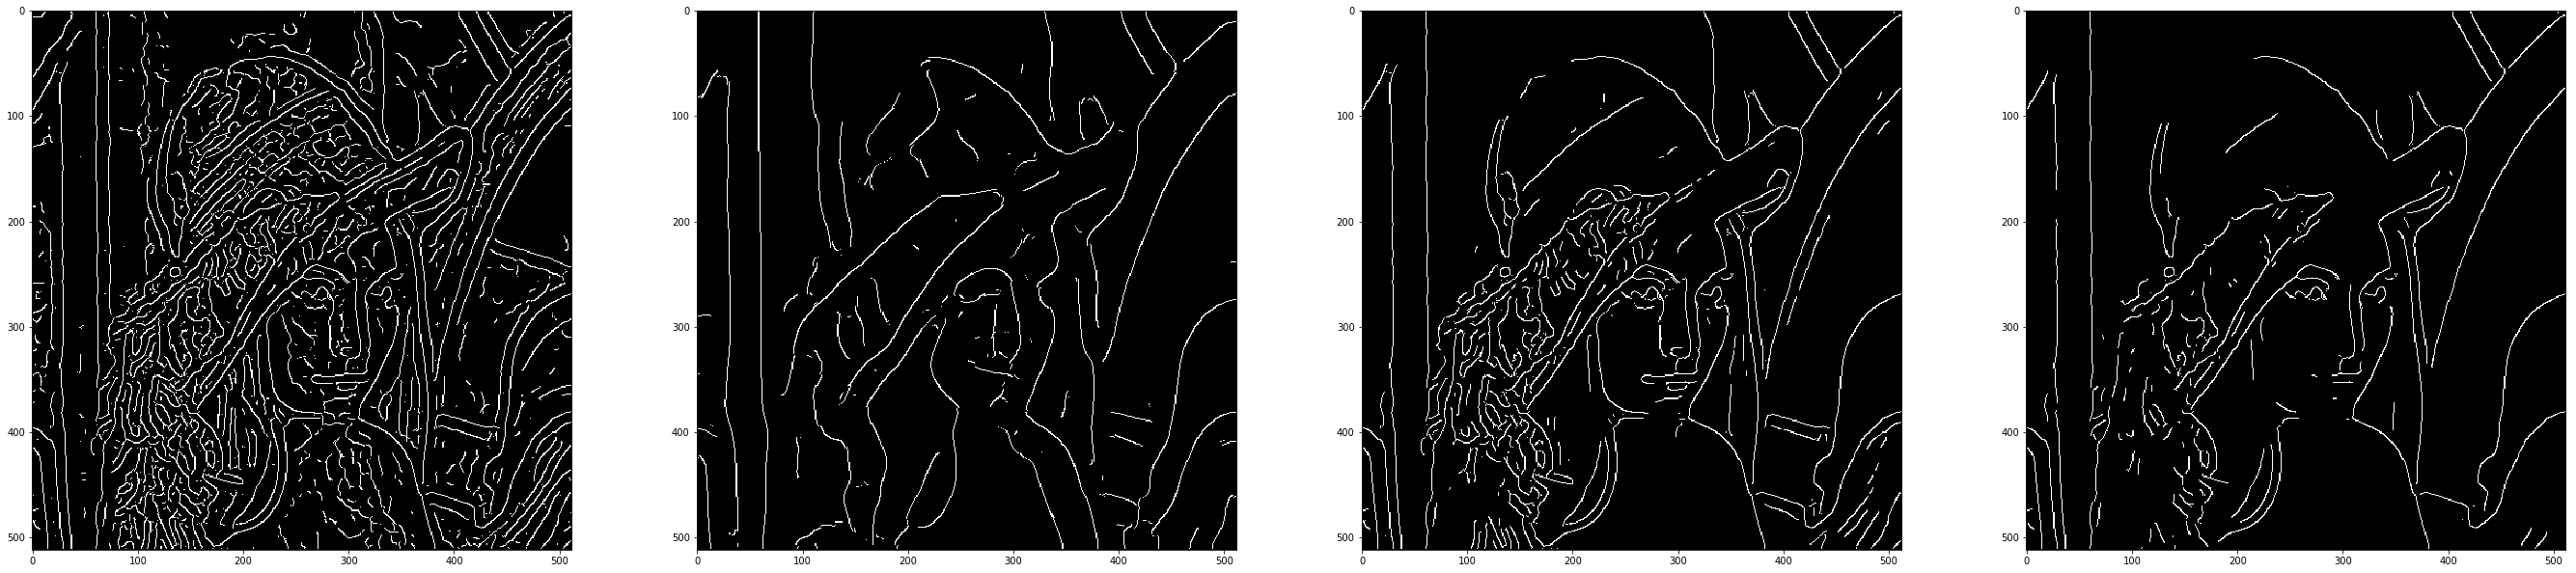

In [18]:
def compare(I):
    sigmas=[3,10,3,3]
    lower_thresholds=[0.001,0.001,0.001,0.01]
    upper_thresholds=[0.002,0.002,0.01,0.02]
    images=[]
    fig = plt.figure(figsize=(24,24))
    
    for i in range(4):
        images.append(canny(I,sigmas[i],lower_thresholds[i],upper_thresholds[i]))
    for n, image in enumerate(images):
        a=fig.add_subplot(6, 6, n + 1)
        plt.imshow(image)
    fig.set_size_inches(np.array(fig.get_size_inches()) * 3)
    plt.show()

compare(I)
        
    

With the first two pictures, we can see that an increase in the value of sigma causes to loose too many details. <br>
Comparing the first and the third picture, we see that if the value of the upper threshold is too low, noise will be kept on the image. <br>
What's more, if the lower threshold is too high, we loose some of the details (as seen in last picture).<br>
On the whole, a value of sigma between 3 and 5 seems appropriate in order not to blur the image too much. A right balance must also be found between the low and the high thresholds in order to keep out the noise without losing all of the details. 